### Loading Libraries

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller


### Loading datasets

In [ ]:
# Define the ticker symbols for the stocks you want to download
tickers = ['AAPL', 'GOOG', 'MSFT', 'AMZN', '^GSPC']

# Download the historical stock data for each ticker symbol
stock_data = yf.download(tickers, start='2010-01-01', end='2023-02-17')

# Print the first few rows of the downloaded data for each stock
print(stock_data.head())

[*********************100%***********************]  5 of 5 completed
           Adj Close                                                Close  \
                AAPL    AMZN       GOOG       MSFT        ^GSPC      AAPL   
Date                                                                        
2010-01-04  6.505280  6.6950  15.610239  23.623894  1132.989990  7.643214   
2010-01-05  6.516528  6.7345  15.541497  23.631531  1136.520020  7.656429   
2010-01-06  6.412873  6.6125  15.149715  23.486504  1137.140015  7.534643   
2010-01-07  6.401018  6.5000  14.797037  23.242260  1141.689941  7.520714   
2010-01-08  6.443575  6.6760  14.994298  23.402544  1144.979980  7.570714   

                                                       ...      Open          \
              AMZN       GOOG       MSFT        ^GSPC  ...      AAPL    AMZN   
Date                                                   ...                     
2010-01-04  6.6950  15.610239  30.950001  1132.989990  ...  7.622500  6.81

In [ ]:
# Download the historical stock data for each ticker symbol
apple = yf.download('AAPL', start='2010-01-01', end='2023-02-17')
apple.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505279,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516527,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412871,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401017,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443574,447610800


In [ ]:
# Download the historical stock data for each ticker symbol
amazon = yf.download('AMZN', start='2010-01-01', end='2023-02-17')
amazon.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,6.8125,6.8305,6.6570,6.6950,6.6950,151998000
2010-01-05,6.6715,6.7740,6.5905,6.7345,6.7345,177038000
2010-01-06,6.7300,6.7365,6.5825,6.6125,6.6125,143576000
2010-01-07,6.6005,6.6160,6.4400,6.5000,6.5000,220604000
2010-01-08,6.5280,6.6840,6.4515,6.6760,6.6760,196610000


In [ ]:
# Download the historical stock data for each ticker symbol
google = yf.download('GOOG', start='2010-01-01', end='2023-02-17')
google.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,15.615220,15.678981,15.547723,15.610239,15.610239,78541293
2010-01-05,15.620949,15.637387,15.480475,15.541497,15.541497,120638494
2010-01-06,15.588072,15.588072,15.102393,15.149715,15.149715,159744526
2010-01-07,15.178109,15.193053,14.760922,14.797037,14.797037,257533695
2010-01-08,14.744733,15.024933,14.672753,14.994298,14.994298,189680313


In [ ]:
# Download the historical stock data for each ticker symbol
microsoft = yf.download('MSFT', start='2010-01-01', end='2023-02-17')
microsoft.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.623903,38409100
2010-01-05,30.850000,31.100000,30.639999,30.959999,23.631533,49749600
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.486502,58182400
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.242252,50559700
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.402542,51197400


In [ ]:
# Download the historical stock data for each ticker symbol
sp500 = yf.download('^GSPC', start='2010-01-01', end='2023-02-17')
sp500.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


### data understanding

In [ ]:
stock_data.columns

MultiIndex([('Adj Close',  'AAPL'),
            ('Adj Close',  'AMZN'),
            ('Adj Close',  'GOOG'),
            ('Adj Close',  'MSFT'),
            ('Adj Close', '^GSPC'),
            (    'Close',  'AAPL'),
            (    'Close',  'AMZN'),
            (    'Close',  'GOOG'),
            (    'Close',  'MSFT'),
            (    'Close', '^GSPC'),
            (     'High',  'AAPL'),
            (     'High',  'AMZN'),
            (     'High',  'GOOG'),
            (     'High',  'MSFT'),
            (     'High', '^GSPC'),
            (      'Low',  'AAPL'),
            (      'Low',  'AMZN'),
            (      'Low',  'GOOG'),
            (      'Low',  'MSFT'),
            (      'Low', '^GSPC'),
            (     'Open',  'AAPL'),
            (     'Open',  'AMZN'),
            (     'Open',  'GOOG'),
            (     'Open',  'MSFT'),
            (     'Open', '^GSPC'),
            (   'Volume',  'AAPL'),
            (   'Volume',  'AMZN'),
            (   'Volume',  '

In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3304 entries, 2010-01-04 to 2023-02-16
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, AAPL)   3304 non-null   float64
 1   (Adj Close, AMZN)   3304 non-null   float64
 2   (Adj Close, GOOG)   3304 non-null   float64
 3   (Adj Close, MSFT)   3304 non-null   float64
 4   (Adj Close, ^GSPC)  3304 non-null   float64
 5   (Close, AAPL)       3304 non-null   float64
 6   (Close, AMZN)       3304 non-null   float64
 7   (Close, GOOG)       3304 non-null   float64
 8   (Close, MSFT)       3304 non-null   float64
 9   (Close, ^GSPC)      3304 non-null   float64
 10  (High, AAPL)        3304 non-null   float64
 11  (High, AMZN)        3304 non-null   float64
 12  (High, GOOG)        3304 non-null   float64
 13  (High, MSFT)        3304 non-null   float64
 14  (High, ^GSPC)       3304 non-null   float64
 15  (Low, AAPL)         3304 non-null   f

### Data Exploration

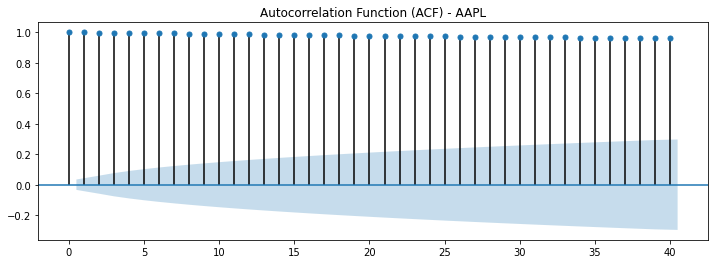

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
sm.graphics.tsa.plot_acf(stock_data[('Adj Close', 'AAPL')], lags=40, ax=ax)
plt.title('Autocorrelation Function (ACF) - AAPL')
plt.show()

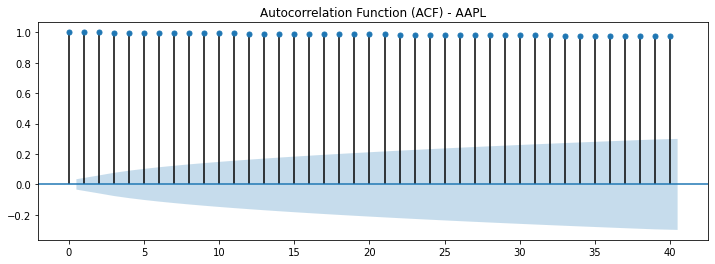

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
sm.graphics.tsa.plot_acf(stock_data[('Adj Close', 'AMZN')], lags=40, ax=ax)
plt.title('Autocorrelation Function (ACF) - AAPL')
plt.show()

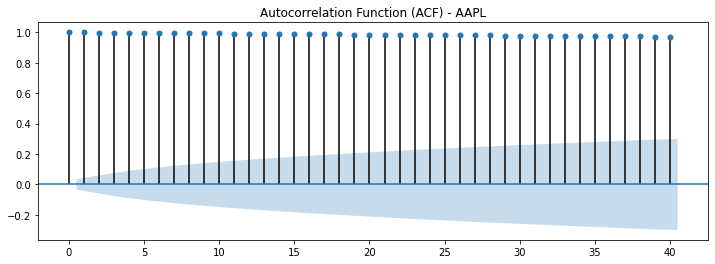

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
sm.graphics.tsa.plot_acf(stock_data[('Adj Close', 'GOOG')], lags=40, ax=ax)
plt.title('Autocorrelation Function (ACF) - AAPL')
plt.show()

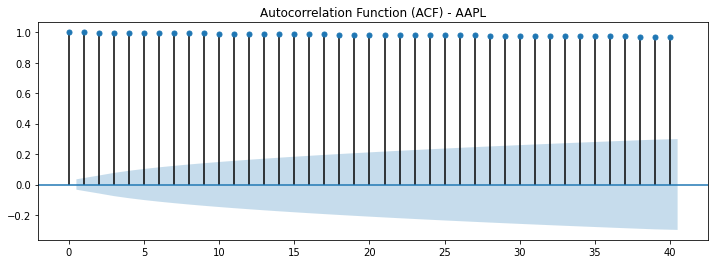

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
sm.graphics.tsa.plot_acf(stock_data[('Adj Close', 'MSFT')], lags=40, ax=ax)
plt.title('Autocorrelation Function (ACF) - AAPL')
plt.show()

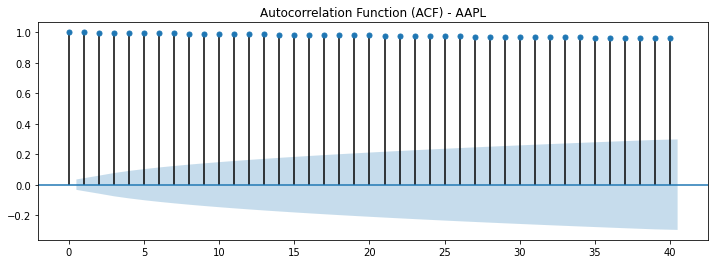

In [ ]:

fig, ax = plt.subplots(figsize=(12, 4))
sm.graphics.tsa.plot_acf(stock_data[('Adj Close', '^GSPC')], lags=40, ax=ax)
plt.title('Autocorrelation Function (ACF) - AAPL')
plt.show()

If all lags in an ACF plot are outside the blue shaded area, it means that there is a strong correlation between the data points at different lags. The presence of strong autocorrelation in the data suggests that there is a pattern or trend in the data that repeats itself over time. This pattern can be used to create forecasting models for future values of the time series. However, it is important to note that strong autocorrelation can also indicate the presence of seasonality or other underlying factors that need to be identified and accounted for in the modeling process.

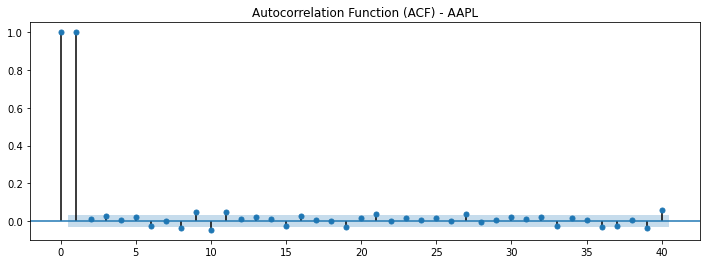

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
sm.graphics.tsa.plot_pacf(stock_data[('Adj Close', 'AAPL')], lags=40, ax=ax)
plt.title('Autocorrelation Function (ACF) - AAPL')
plt.show()

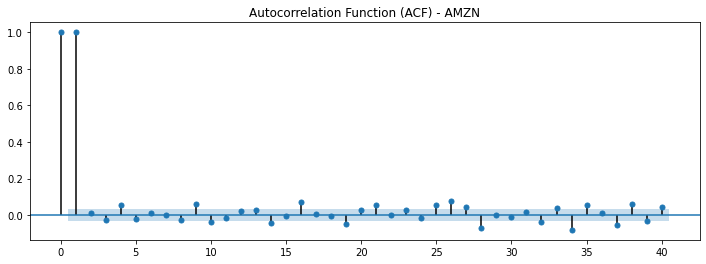

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
sm.graphics.tsa.plot_pacf(stock_data[('Adj Close', 'AMZN')], lags=40, ax=ax)
plt.title('Autocorrelation Function (ACF) - AMZN')
plt.show()

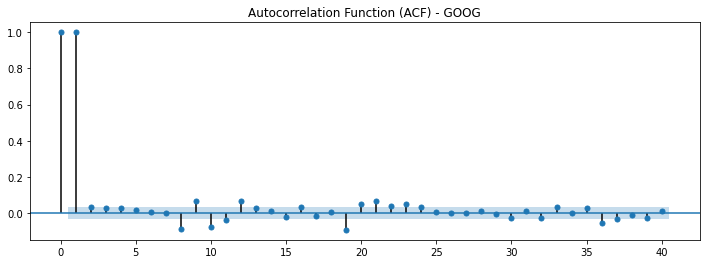

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
sm.graphics.tsa.plot_pacf(stock_data[('Adj Close', 'GOOG')], lags=40, ax=ax)
plt.title('Autocorrelation Function (ACF) - GOOG')
plt.show()

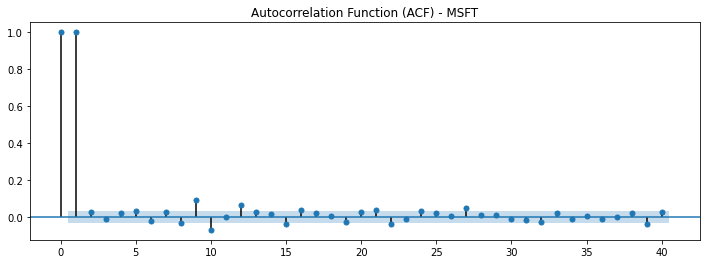

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
sm.graphics.tsa.plot_pacf(stock_data[('Adj Close', 'MSFT')], lags=40, ax=ax)
plt.title('Autocorrelation Function (ACF) - MSFT')
plt.show()

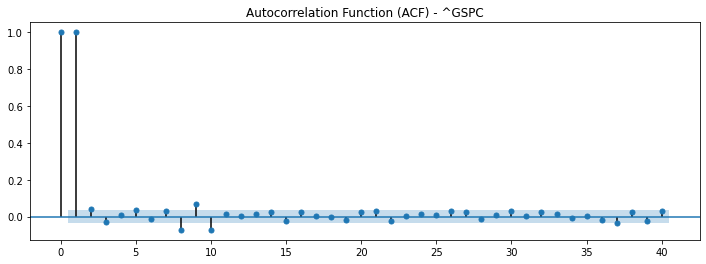

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
sm.graphics.tsa.plot_pacf(stock_data[('Adj Close', '^GSPC')], lags=40, ax=ax)
plt.title('Autocorrelation Function (ACF) - ^GSPC')
plt.show()

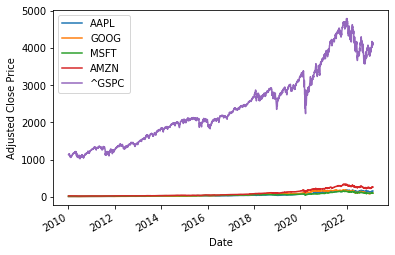

In [ ]:
# Plot the adjusted closing prices for each ticker symbol
stock_data['Adj Close'].plot()
plt.legend(tickers)
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

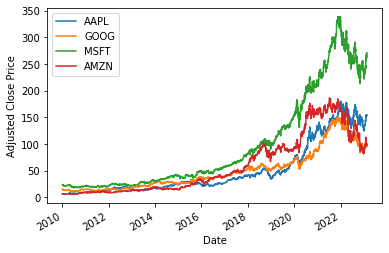

In [ ]:
# Plot the adjusted closing prices for each individual stock (excluding ^GSPC)
stock_data['Adj Close'][tickers[:-1]].plot()
plt.legend(tickers[:-1])
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

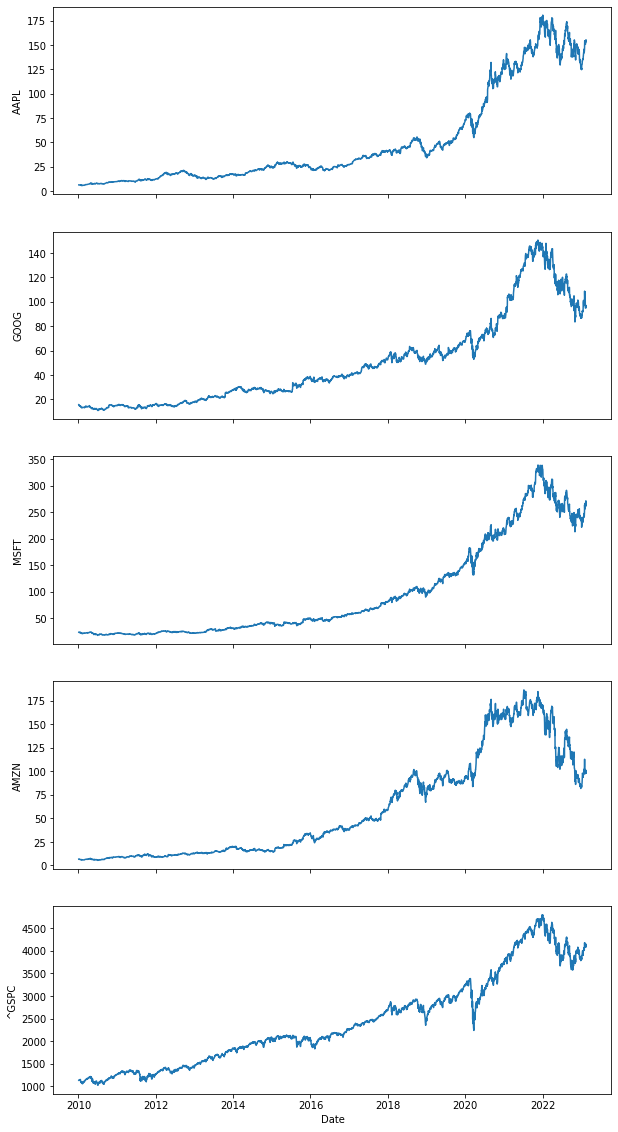

In [ ]:
# Plot the adjusted closing prices for each ticker symbol on its own y-axis
fig, axs = plt.subplots(len(tickers), 1, figsize=(10, 20), sharex=True)
for i, ticker in enumerate(tickers):
    axs[i].plot(stock_data['Adj Close'][ticker])
    axs[i].set_ylabel(ticker)
plt.xlabel('Date')
plt.show()

In [ ]:
stock_data.head()

Adj Close                                                Close  \
                AAPL    AMZN       GOOG       MSFT        ^GSPC      AAPL   
Date                                                                        
2010-01-04  6.505280  6.6950  15.610239  23.623894  1132.989990  7.643214   
2010-01-05  6.516528  6.7345  15.541497  23.631531  1136.520020  7.656429   
2010-01-06  6.412873  6.6125  15.149715  23.486504  1137.140015  7.534643   
2010-01-07  6.401018  6.5000  14.797037  23.242260  1141.689941  7.520714   
2010-01-08  6.443575  6.6760  14.994298  23.402544  1144.979980  7.570714   

                                                       ...      Open          \
              AMZN       GOOG       MSFT        ^GSPC  ...      AAPL    AMZN   
Date                                                   ...                     
2010-01-04  6.6950  15.610239  30.950001  1132.989990  ...  7.622500  6.8125   
2010-01-05  6.7345  15.541497  30.959999  1136.520020  ...  7.664286  6.6715   
2010-01-06  6.6125  15.149715  30.770000  1137.140015  ...  7.656429  6.7300   
2010-01-07  6.5000  14.797037  30.450001  1141.689941  ...  7.562500  6.6005   
2010-01-08  6.6760  14.994298  30.660000  1144.979980  ...  7.510714  6.5280   

                                                  Volume             \
                 GOOG       MSFT        ^GSPC       AAPL       AMZN   
Date                                                                  
2010-01-04  15.615220  30.620001  1116.560059  493729600  151998000   
2010-01-05  15.620949  30.850000  1132.660034  601904800  177038000   
2010-01-06  15.588072  30.879999  1135.709961  552160000  143576000   
2010-01-07  15.178109  30.629999  1136.270020  477131200  220604000   
2010-01-08  14.744733  30.280001  1140.520020  447610800  196610000   

                                             
                 GOOG      MSFT       ^GSPC  
Date                                         
2010-01-04   78541293  38409100  3991400000  
2010-01-05  120638494  49749600  2491020000  
2010-01-06  159744526  58182400  4972660000  
2010-01-07  257533695  50559700  5270680000  
2010-01-08  189680313  51197400  4389590000  

[5 rows x 30 columns]

### ACF, PACF, ADF

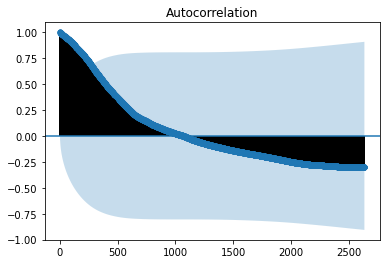

In [ ]:
plot_acf(apple['Adj Close'], zero = False, lags = 2636)
plt.show()

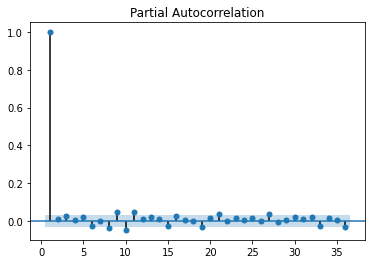

In [ ]:
plot_pacf(apple['Adj Close'], zero = False)
plt.show()

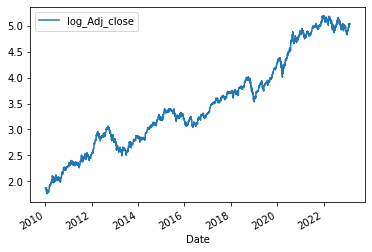

In [ ]:
apple['log_Adj_close'] = np.log(apple['Adj Close'])
apple[['log_Adj_close']].plot()

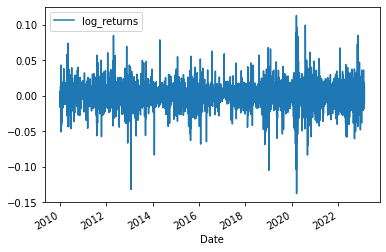

In [ ]:
apple['log_returns'] = np.log(apple['Adj Close'] / apple['Adj Close'].shift(1))
apple[['log_returns']].plot()

In [ ]:
# Remove missing values
apple.dropna(inplace=True)

# Compute summary statistics
log_returns_stats = apple['log_returns'].describe()
print(log_returns_stats)

# Conduct the ADF test
result = adfuller(apple['log_returns'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

count    3303.000000
mean        0.000957
std         0.018088
min        -0.137708
25%        -0.007597
50%         0.000940
75%         0.010690
max         0.113157
Name: log_returns, dtype: float64
ADF Statistic: -11.806097229691755
p-value: 9.088822451753244e-22
Critical Values: {'1%': -3.4323446429448277, '5%': -2.862421314897806, '10%': -2.567239142377757}


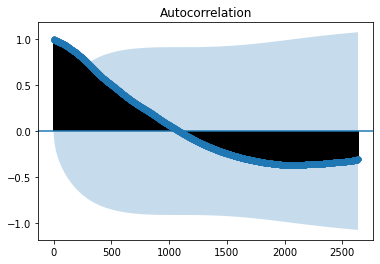

In [ ]:
plot_acf(amazon['Adj Close'], zero = False, lags = 2636)
plt.show()

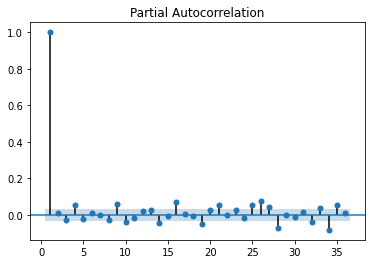

In [ ]:
plot_pacf(amazon['Adj Close'], zero = False)
plt.show()

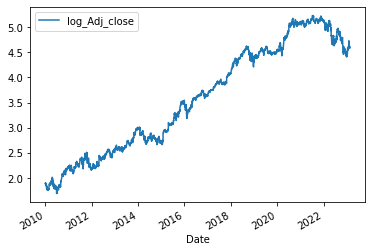

In [ ]:
amazon['log_Adj_close'] = np.log(amazon['Adj Close'])
amazon[['log_Adj_close']].plot()

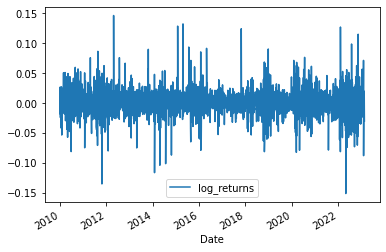

In [ ]:
amazon['log_returns'] = np.log(amazon['Adj Close'] / amazon['Adj Close'].shift(1))
amazon[['log_returns']].plot()

In [ ]:
# Remove missing values
amazon.dropna(inplace=True)

# Compute summary statistics
log_returns_stats = amazon['log_returns'].describe()
print(log_returns_stats)

# Conduct the ADF test
result = adfuller(amazon['log_returns'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

count    3303.000000
mean        0.000813
std         0.020863
min        -0.151398
25%        -0.009112
50%         0.000955
75%         0.011650
max         0.146225
Name: log_returns, dtype: float64
ADF Statistic: -58.51106504683066
p-value: 0.0
Critical Values: {'1%': -3.432331947568442, '5%': -2.8624157074274668, '10%': -2.5672361570855684}


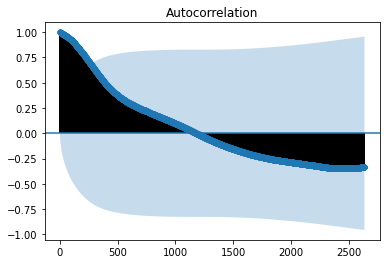

In [ ]:
plot_acf(google['Adj Close'], zero = False, lags = 2636)
plt.show()

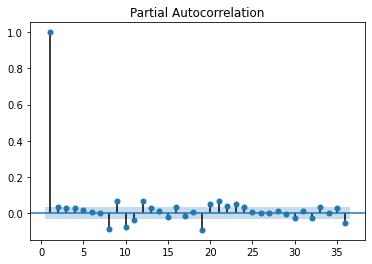

In [ ]:
plot_pacf(google['Adj Close'], zero = False)
plt.show()

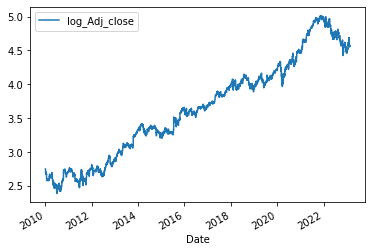

In [ ]:
google['log_Adj_close'] = np.log(google['Adj Close'])
google[['log_Adj_close']].plot()

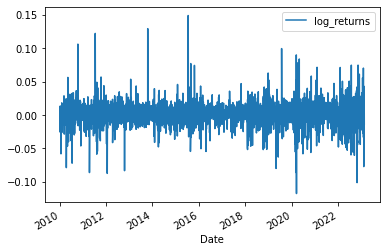

In [ ]:
google['log_returns'] = np.log(google['Adj Close'] / google['Adj Close'].shift(1))
google[['log_returns']].plot()

In [ ]:
# Remove missing values
google.dropna(inplace=True)

# Compute summary statistics
log_returns_stats = google['log_returns'].describe()
print(log_returns_stats)

# Conduct the ADF test
result = adfuller(google['log_returns'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

count    3303.000000
mean        0.000549
std         0.017147
min        -0.117667
25%        -0.006992
50%         0.000658
75%         0.008902
max         0.148872
Name: log_returns, dtype: float64
ADF Statistic: -13.374409069273659
p-value: 5.1220985456210705e-25
Critical Values: {'1%': -3.4323446429448277, '5%': -2.862421314897806, '10%': -2.567239142377757}


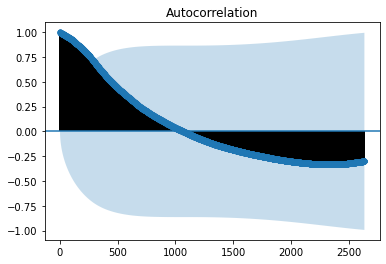

In [ ]:
plot_acf(microsoft['Adj Close'], zero = False, lags = 2636)
plt.show()

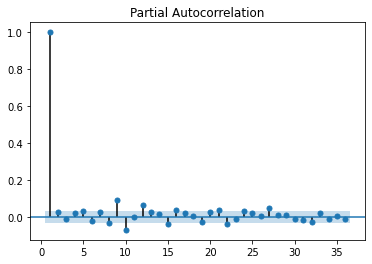

In [ ]:
plot_pacf(microsoft['Adj Close'], zero = False)
plt.show()

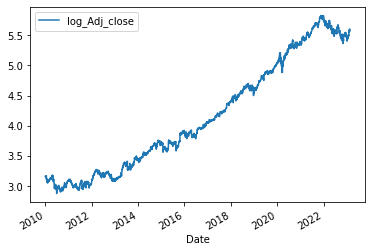

In [ ]:
microsoft['log_Adj_close'] = np.log(microsoft['Adj Close'])
microsoft[['log_Adj_close']].plot()

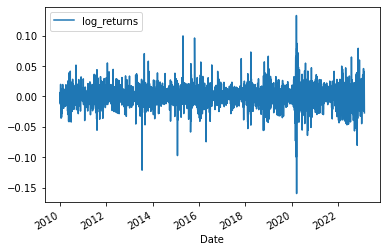

In [ ]:
microsoft['log_returns'] = np.log(microsoft['Adj Close'] / microsoft['Adj Close'].shift(1))
microsoft[['log_returns']].plot()

In [ ]:
# Remove missing values
microsoft.dropna(inplace=True)

# Compute summary statistics
log_returns_stats = microsoft['log_returns'].describe()
print(log_returns_stats)

# Conduct the ADF test
result = adfuller(microsoft['log_returns'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

count    3303.000000
mean        0.000729
std         0.016434
min        -0.159453
25%        -0.007178
50%         0.000653
75%         0.009104
max         0.132929
Name: log_returns, dtype: float64
ADF Statistic: -20.47829555855904
p-value: 0.0
Critical Values: {'1%': -3.4323367648004606, '5%': -2.8624178351722858, '10%': -2.5672372898489977}


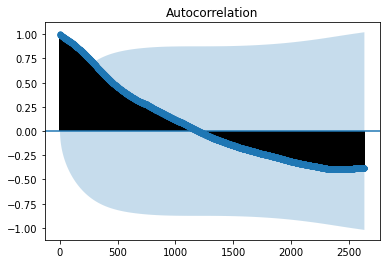

In [ ]:
plot_acf(sp500['Adj Close'], zero = False, lags = 2636)
plt.show()

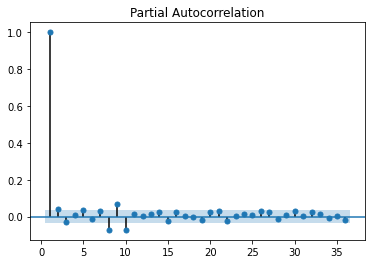

In [ ]:
plot_pacf(sp500['Adj Close'], zero = False)
plt.show()

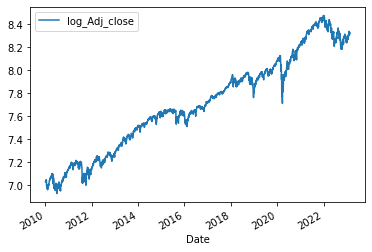

In [ ]:
sp500['log_Adj_close'] = np.log(sp500['Adj Close'])
sp500[['log_Adj_close']].plot()

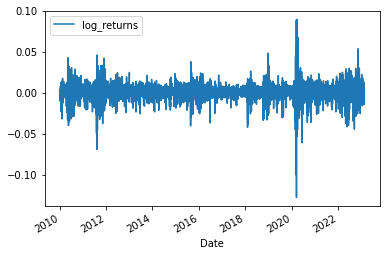

In [ ]:
sp500['log_returns'] = np.log(sp500['Adj Close'] / sp500['Adj Close'].shift(1))
sp500[['log_returns']].plot()

In [ ]:
# Remove missing values
sp500.dropna(inplace=True)

# Compute summary statistics
log_returns_stats = sp500['log_returns'].describe()
print(log_returns_stats)

# Conduct the ADF test
result = adfuller(sp500['log_returns'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

count    3303.000000
mean        0.000389
std         0.011246
min        -0.127652
25%        -0.003883
50%         0.000634
75%         0.005651
max         0.089683
Name: log_returns, dtype: float64
ADF Statistic: -12.542646983922344
p-value: 2.2964537061210893e-23
Critical Values: {'1%': -3.4323476896620915, '5%': -2.862422660610693, '10%': -2.567239858805894}


The null hypothesis of the test is that the time series has a unit root, which means that it is non-stationary. The alternate hypothesis is that the time series does not have a unit root, which means that it is stationary.

The test statistic from the ADF test is negative, and the more negative it is, the stronger the evidence against the null hypothesis. If the test statistic is more negative than the critical value at a chosen significance level, then the null hypothesis can be rejected and the time series is considered stationary.

In addition to the test statistic, the ADF test also reports the p-value of the test. If the p-value is less than the chosen significance level, then the null hypothesis can be rejected and the time series is considered stationary. Otherwise, the null hypothesis cannot be rejected and the time series is considered non-stationary.

the log retuns of the apple, amazon, google, microsoft and s&p 500 index are stationary

There are volatility clusters and the time series is mean reverting

### AR-GARCH Model

AR-GARCH is a type of time series model that combines the autoregressive (AR) model with the generalized autoregressive conditional heteroscedasticity (GARCH) model.

In an AR-GARCH model, the autoregressive component models the mean of the time series, while the GARCH component models the conditional variance. The AR component helps capture any trend or seasonality in the series, while the GARCH component captures the volatility clustering, where periods of high volatility are followed by other periods of high volatility, and vice versa.

The AR-GARCH model is commonly used in finance and economics to model financial time series, such as stock prices, exchange rates, and interest rates. By estimating the parameters of the model, analysts can make forecasts of future values and assess the risk associated with the forecast.

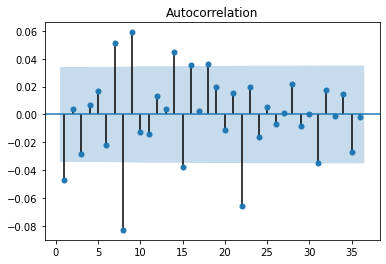

In [ ]:
plot_acf(apple['log_returns'], zero = False)
plt.show()

Apple MA(1)

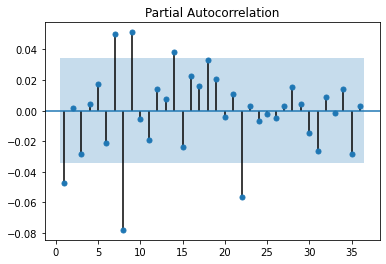

In [ ]:
plot_pacf(apple['log_returns'], zero = False)
plt.show()

Apple AR(1)

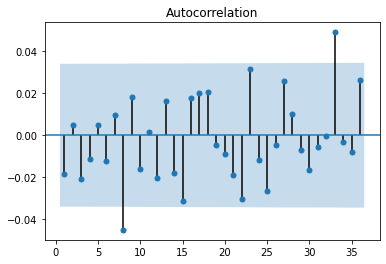

In [ ]:
plot_acf(amazon['log_returns'], zero = False)
plt.show()

Amazon MA(7)

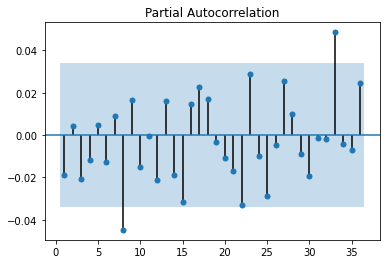

In [ ]:
plot_pacf(amazon['log_returns'], zero = False)
plt.show()

Amazon AR(7)

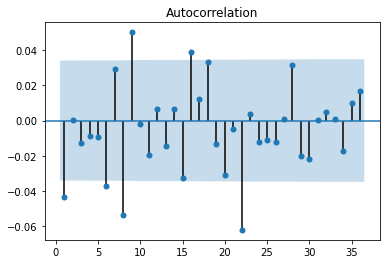

In [ ]:
plot_acf(google['log_returns'], zero = False)
plt.show()

Googl MA(1)

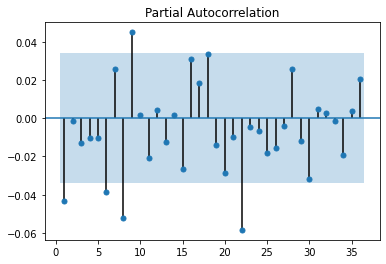

In [ ]:
plot_pacf(google['log_returns'], zero = False)
plt.show()

Google AR(1)

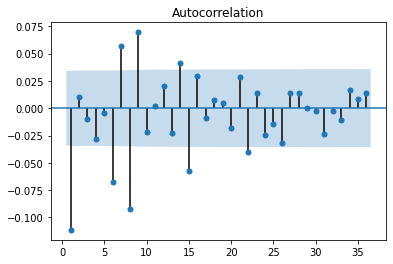

In [ ]:
plot_acf(microsoft['log_returns'], zero = False)
plt.show()

Microsoft MA(1)

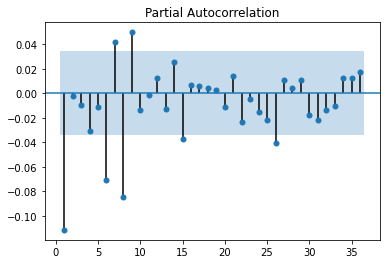

In [ ]:
plot_pacf(microsoft['log_returns'], zero = False)
plt.show()

microsoft AR(1)

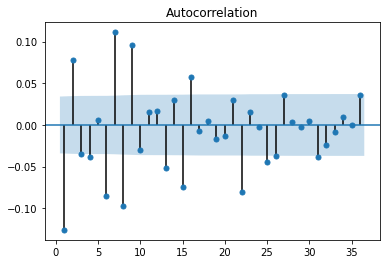

In [ ]:
plot_acf(sp500['log_returns'], zero = False)
plt.show()

S&P 500 MA(4)

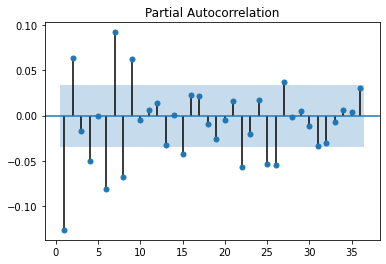

In [ ]:
plot_pacf(sp500['log_returns'], zero = False)
plt.show()

S&P 500 AR(2)

In [ ]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import arch
from arch import arch_model
import pandas as pd
from statsmodels.tsa.stattools import adfuller

In [ ]:
# # Extract log returns columns and merge into one dataframe
# data = pd.DataFrame(index=apple.index)
# data['AAPL'] = apple['log_returns']
# data['AMZN'] = amazon['log_returns']
# data['GOOG'] = google['log_returns']
# data['MSFT'] = microsoft['log_returns']
# data['SP500'] = sp500['log_returns']

# # Drop null values and replace inf with NaN
# data = data.replace([np.inf, -np.inf], np.nan)
# data = data.dropna()

# # Perform ADF test for each column to check for cointegration
# for col in data.columns:
#     result = adfuller(data[col])
#     print(f'{col} ADF Statistic: {result[0]}')
#     print(f'{col} p-value: {result[1]}')

In this case, we see that all the columns have ADF statistics with very negative values and very small p-values (in fact, some p-values are so small they are in scientific notation), which suggests strong evidence that each of the columns is stationary and cointegrated with the others.

In [ ]:
# Extract log returns columns and merge into one dataframe
data = pd.DataFrame(index=apple.index)
data[['AAPL', 'AAPL_Volume']] = apple[['log_returns', 'Volume']]
data[['AMZN', 'AMZN_Volume']] = amazon[['log_returns', 'Volume']]
data[['GOOG', 'GOOG_Volume']] = google[['log_returns', 'Volume']]
data[['MSFT', 'MSFT_Volume']] = microsoft[['log_returns', 'Volume']]
data[['SP500', 'SP500_Volume']] = sp500[['log_returns', 'Volume']]

# Drop null values and replace inf with NaN
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()

# Perform ADF test for each column to check for cointegration
for col in data.columns:
    result = adfuller(data[col])
    print(f'{col} ADF Statistic: {result[0]}')
    print(f'{col} p-value: {result[1]}')

AAPL ADF Statistic: -11.806097229691755
AAPL p-value: 9.088822451753244e-22
AAPL_Volume ADF Statistic: -3.1032554708032585
AAPL_Volume p-value: 0.026313205241404833
AMZN ADF Statistic: -58.51106504683066
AMZN p-value: 0.0
AMZN_Volume ADF Statistic: -9.285782803563974
AMZN_Volume p-value: 1.2165831656421465e-15
GOOG ADF Statistic: -13.374409069273659
GOOG p-value: 5.1220985456210705e-25
GOOG_Volume ADF Statistic: -3.6685309699962065
GOOG_Volume p-value: 0.004578209867717821
MSFT ADF Statistic: -20.47829555855904
MSFT p-value: 0.0
MSFT_Volume ADF Statistic: -4.550375275187249
MSFT_Volume p-value: 0.00015928847435205733
SP500 ADF Statistic: -12.542646983922344
SP500 p-value: 2.2964537061210893e-23
SP500_Volume ADF Statistic: -5.566395651806452
SP500_Volume p-value: 1.5013604884167296e-06


In [ ]:
data.head()

,AAPL,AAPL_Volume,AMZN,AMZN_Volume,GOOG,GOOG_Volume,MSFT,MSFT_Volume,SP500,SP500_Volume
Date,,,,,,,,,,
2010-01-05,0.001728,601904800,0.005883,177038000,-0.004413,120638494,0.000323,49749600,0.003111,2491020000
2010-01-06,-0.016034,552160000,-0.018282,143576000,-0.025532,159744526,-0.006156,58182400,0.000545,4972660000
2010-01-07,-0.001850,477131200,-0.017160,220604000,-0.023555,257533695,-0.010454,50559700,0.003993,5270680000
2010-01-08,0.006626,447610800,0.026717,196610000,0.013243,189680313,0.006873,51197400,0.002878,4389590000
2010-01-11,-0.008861,462229600,-0.024335,175588000,-0.001513,289597429,-0.012802,68754700,0.001745,4255780000


In [ ]:
# data.to_csv('stock.csv')

In [ ]:
# from pmdarima.arima import auto_arima
# from arch import arch_model
# import pandas as pd

# # Find optimal p and q for GARCH model
# model = arch_model(data['AAPL'], mean='Zero', vol='GARCH', p=1, q=0)
# results = auto_arima(data['AAPL'], start_p=0, start_q=0, max_p=5, max_q=5,
#                      m=1, d=None, D=None, seasonal=False, trace=False,
#                      error_action='ignore', suppress_warnings=True)
# p, q = results.order
# print(f'Optimal p = {p}, q = {q}')

In [ ]:
import pandas as pd

# Set start and end dates for training and testing data
train_start_date = '2000-01-01'
train_end_date = '2021-12-31'
test_start_date = '2022-01-01'
test_end_date = '2023-02-17'

# Filter data by date range
train_data = data.loc[(data.index >= train_start_date) & (data.index <= train_end_date)]
test_data = data.loc[(data.index >= test_start_date) & (data.index <= test_end_date)]

# Drop the "Date" column from the training and testing data
print(train_data.shape)
print(test_data.shape)


(3020, 10)
(283, 10)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3303 entries, 2010-01-05 to 2023-02-16
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AAPL          3303 non-null   float64
 1   AAPL_Volume   3303 non-null   int64  
 2   AMZN          3303 non-null   float64
 3   AMZN_Volume   3303 non-null   int64  
 4   GOOG          3303 non-null   float64
 5   GOOG_Volume   3303 non-null   int64  
 6   MSFT          3303 non-null   float64
 7   MSFT_Volume   3303 non-null   int64  
 8   SP500         3303 non-null   float64
 9   SP500_Volume  3303 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 283.9 KB


In [ ]:
# Fit an ARMA-GARCH(p,q) model to the train data
model = arch_model(train_data['AAPL'], mean='AR', lags=1, vol='GARCH', p=1, q=1)
results = model.fit()

# Print the summary of the model
print(results.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 6428580446.833031
Iteration:      2,   Func. Count:     21,   Neg. LLF: 1242554715268.1787
Iteration:      3,   Func. Count:     37,   Neg. LLF: 152758.40525261892
Iteration:      4,   Func. Count:     49,   Neg. LLF: 146968391984.60873
Iteration:      5,   Func. Count:     64,   Neg. LLF: 406666498538881.75
Iteration:      6,   Func. Count:     80,   Neg. LLF: 43993286.698779844
Iteration:      7,   Func. Count:     93,   Neg. LLF: 1339456141665163.0
Iteration:      8,   Func. Count:    109,   Neg. LLF: 1324723.9164674152
Iteration:      9,   Func. Count:    121,   Neg. LLF: 869324621797.4124
Iteration:     10,   Func. Count:    137,   Neg. LLF: 474041071.44445497
Iteration:     11,   Func. Count:    149,   Neg. LLF: -8130.029049793891
Optimization terminated successfully    (Exit mode 0)
            Current function value: -8130.029054875511
            Iterations: 15
            Function evaluations: 149
            Gradient eval

/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003119. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
# Fit an ARMA-GARCH(p,q) model to the train data
model = arch_model(train_data['AAPL'], mean='AR', lags=1, vol='GARCH', p=7, q=7)
results = model.fit()

# Print the summary of the model
print(results.summary())

Iteration:      1,   Func. Count:     19,   Neg. LLF: 4957136249.968184


/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003119. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      2,   Func. Count:     45,   Neg. LLF: 3955021.606233623
Iteration:      3,   Func. Count:     70,   Neg. LLF: 7147765.843180372
Iteration:      4,   Func. Count:     94,   Neg. LLF: 1100365.2399526343
Iteration:      5,   Func. Count:    118,   Neg. LLF: 16576694.935318198
Iteration:      6,   Func. Count:    143,   Neg. LLF: 3019841.821295391
Iteration:      7,   Func. Count:    168,   Neg. LLF: 615349.8013218073
Iteration:      8,   Func. Count:    193,   Neg. LLF: 22691069.192778233
Iteration:      9,   Func. Count:    215,   Neg. LLF: 2619817.712262837
Iteration:     10,   Func. Count:    239,   Neg. LLF: 341372015.9075183
Iteration:     11,   Func. Count:    264,   Neg. LLF: 19116192.86801796
Iteration:     12,   Func. Count:    289,   Neg. LLF: 3452432.594434475
Iteration:     13,   Func. Count:    314,   Neg. LLF: 19522.455417113622
Iteration:     14,   Func. Count:    336,   Neg. LLF: 1643003571.4474542
Iteration:     15,   Func. Count:    362,   Neg. LLF: 99757

In [ ]:
# Fit an ARMA-GARCH(p,q) model to the train data
model = arch_model(train_data['AAPL'], mean='AR', lags=1, vol='GARCH', p=9, q=9)
results = model.fit()

# Print the summary of the model
print(results.summary())

Iteration:      1,   Func. Count:     23,   Neg. LLF: 3356477342.0453167
Iteration:      2,   Func. Count:     53,   Neg. LLF: 7226281.469648127
Iteration:      3,   Func. Count:     83,   Neg. LLF: 288708.42623158835
Iteration:      4,   Func. Count:    112,   Neg. LLF: 18128885.742908575
Iteration:      5,   Func. Count:    141,   Neg. LLF: 844335.3742384731
Iteration:      6,   Func. Count:    170,   Neg. LLF: 279155.3860658124
Optimization terminated successfully    (Exit mode 0)
            Current function value: -8105.676503761746
            Iterations: 7
            Function evaluations: 178
            Gradient evaluations: 6


/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003119. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                           AR - GARCH Model Results                           
Dep. Variable:                   AAPL   R-squared:                       0.002
Mean Model:                        AR   Adj. R-squared:                  0.002
Vol Model:                      GARCH   Log-Likelihood:                8105.68
Distribution:                  Normal   AIC:                          -16169.4
Method:            Maximum Likelihood   BIC:                          -16043.1
                                        No. Observations:                 3019
Date:                Sun, Feb 19 2023   Df Residuals:                     3017
Time:                        09:05:17   Df Model:                            2
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
Const      1.5226e-03  3.023e-04      5.037  4.720e-

The two model summaries seem to be very similar with only slight variations. Both models are AR-GARCH models with a Normal distribution assumption. The mean model in both cases is an AR model with lag 1, and the GARCH model has 7 lags for both alpha and beta.

The major difference is in the coefficient for the AAPL[1] variable, which is the first lag of the AAPL stock price. In the first model, the coefficient is -0.0454 with a p-value of 0.086, while in the second model, the coefficient is -0.0452 with a p-value of 0.033. This suggests that the second model has a slightly stronger relationship between the current stock price and the lagged price.

Additionally, the second model has a slightly lower log-likelihood and AIC value, which are measures of how well the model fits the data and how well it balances complexity with goodness of fit. Overall, both models appear to be similar, but the second model may have a slight advantage in terms of fit.

To determine which model performed better, we need to compare the performance metrics of both models, such as AIC, BIC, and Log-Likelihood. A lower AIC and BIC and a higher log-likelihood indicate a better model fit.

From the information you provided, I see that the second model has an AIC of -16183.0, a BIC of -16080.8, and a Log-Likelihood of 8108.48. The first model, on the other hand, has an AIC of -16234.2, a BIC of -16204.2, and a Log-Likelihood of 8122.11.

Comparing the values, we can see that the second model has a lower AIC and BIC and a slightly higher log-likelihood, indicating that it has a better model fit than the first one. Therefore, based on the information you provided, the AR-GARCH model results 2 performed better.

In [ ]:
# Fit an ARMA-GARCH(p,q) model to the train data
model = arch_model(train_data['AMZN'], mean='AR', lags=1, vol='GARCH', p=7, q=7)
results = model.fit()

# Print the summary of the model
print(results.summary())

Iteration:      1,   Func. Count:     19,   Neg. LLF: 781422846.6006675
Iteration:      2,   Func. Count:     44,   Neg. LLF: 97430.44103978171
Iteration:      3,   Func. Count:     68,   Neg. LLF: 15888.343061692169
Iteration:      4,   Func. Count:     91,   Neg. LLF: 58720.052578339266
Iteration:      5,   Func. Count:    115,   Neg. LLF: 306046.38346712233
Iteration:      6,   Func. Count:    140,   Neg. LLF: 7487.091867135736
Iteration:      7,   Func. Count:    164,   Neg. LLF: 78028717.12087071
Iteration:      8,   Func. Count:    189,   Neg. LLF: 51727858.76323913
Iteration:      9,   Func. Count:    214,   Neg. LLF: 33453.90951784839


/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000383. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:     10,   Func. Count:    238,   Neg. LLF: 12029903.831724763
Iteration:     11,   Func. Count:    262,   Neg. LLF: -7691.093376056218
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7691.093377695655
            Iterations: 15
            Function evaluations: 262
            Gradient evaluations: 11
                           AR - GARCH Model Results                           
Dep. Variable:                   AMZN   R-squared:                       0.000
Mean Model:                        AR   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                7691.09
Distribution:                  Normal   AIC:                          -15348.2
Method:            Maximum Likelihood   BIC:                          -15246.0
                                        No. Observations:                 3019
Date:                Sun, Feb 19 2023   Df Residuals:                     3017
Time:      

In [ ]:
# Fit an ARMA-GARCH(p,q) model to the train data
model = arch_model(train_data['AMZN'], mean='AR', lags=1, vol='GARCH', p=1, q=0)
results = model.fit()

# Print the summary of the model
print(results.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 44204923112.46437
Iteration:      2,   Func. Count:     18,   Neg. LLF: 3.008420594060988e+19
Iteration:      3,   Func. Count:     30,   Neg. LLF: 5.208025247587057e+20
Iteration:      4,   Func. Count:     44,   Neg. LLF: 8.484226294360778e+20
Iteration:      5,   Func. Count:     59,   Neg. LLF: 465345.0941044022
Iteration:      6,   Func. Count:     70,   Neg. LLF: 1.9030175108546527e+20
Iteration:      7,   Func. Count:     85,   Neg. LLF: 1.4911221634814735e+18
Iteration:      8,   Func. Count:     97,   Neg. LLF: 1.1193434159217387e+17
Iteration:      9,   Func. Count:    108,   Neg. LLF: -7496.282904623098
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7496.282897117579
            Iterations: 13
            Function evaluations: 108
            Gradient evaluations: 9
                           AR - ARCH Model Results                            
Dep. Variable:                   AM

/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000383. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
# Fit an ARMA-GARCH(p,q) model to the train data
model = arch_model(train_data['AMZN'], mean='AR', lags=1, vol='GARCH', p=1, q=1)
results = model.fit()

# Print the summary of the model
print(results.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 19700347509.255207
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2309725.7156321136
Iteration:      3,   Func. Count:     30,   Neg. LLF: -3291.850648110316
Iteration:      4,   Func. Count:     40,   Neg. LLF: 9466.210871888094
Iteration:      5,   Func. Count:     50,   Neg. LLF: 5966.42831847358
Iteration:      6,   Func. Count:     58,   Neg. LLF: -7515.850891919974
Iteration:      7,   Func. Count:     67,   Neg. LLF: -7465.06536770113


/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000383. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      8,   Func. Count:     76,   Neg. LLF: -7413.331619591091
Iteration:      9,   Func. Count:     84,   Neg. LLF: -5052.120615146116
Iteration:     10,   Func. Count:     93,   Neg. LLF: -7719.953664406383
Iteration:     11,   Func. Count:     99,   Neg. LLF: -7719.954292501343
Iteration:     12,   Func. Count:    105,   Neg. LLF: -7719.9544080000205
Iteration:     13,   Func. Count:    110,   Neg. LLF: -7719.954408000639
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7719.9544080000205
            Iterations: 13
            Function evaluations: 110
            Gradient evaluations: 13
                           AR - GARCH Model Results                           
Dep. Variable:                   AMZN   R-squared:                      -0.001
Mean Model:                        AR   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:                7719.95
Distribution:                  No

In [ ]:
# Fit an ARMA-GARCH(p,q) model to the train data
model = arch_model(train_data['AMZN'], mean='AR', lags=1, vol='GARCH', p=33, q=33)
results = model.fit()

# Print the summary of the model
print(results.summary())

/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000383. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:     71,   Neg. LLF: 22708533.775022388
Iteration:      2,   Func. Count:    148,   Neg. LLF: 8846.943229021419
Iteration:      3,   Func. Count:    224,   Neg. LLF: 304750.81779349054
Iteration:      4,   Func. Count:    301,   Neg. LLF: 12706.760531390391
Iteration:      5,   Func. Count:    378,   Neg. LLF: 39045.51661339604
Iteration:      6,   Func. Count:    453,   Neg. LLF: 43205.64259163682
Iteration:      7,   Func. Count:    528,   Neg. LLF: 13528273.010891123
Iteration:      8,   Func. Count:    605,   Neg. LLF: 7602.3029443405285
Iteration:      9,   Func. Count:    680,   Neg. LLF: 47572375.73426424
Iteration:     10,   Func. Count:    757,   Neg. LLF: -2769.778638089291
Iteration:     11,   Func. Count:    828,   Neg. LLF: -7651.316837802225
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7651.316838764773
            Iterations: 15
            Function evaluations: 828
            Gradient evalua

For Amazon model 2 performed better with p= 1 and q= 0

In [ ]:
# Fit an ARMA-GARCH(p,q) model to the train data
model = arch_model(train_data['GOOG'], mean='AR', lags=1, vol='GARCH', p=1, q=1)
results = model.fit()

# Print the summary of the model
print(results.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 1235733043.9856963
Iteration:      2,   Func. Count:     20,   Neg. LLF: 80231017.1687372
Iteration:      3,   Func. Count:     33,   Neg. LLF: 1147458.3779290922
Iteration:      4,   Func. Count:     45,   Neg. LLF: 71340.01666041203
Iteration:      5,   Func. Count:     56,   Neg. LLF: 356664939.5021711
Iteration:      6,   Func. Count:     69,   Neg. LLF: 2171840.9400248225
Iteration:      7,   Func. Count:     81,   Neg. LLF: 81432225.76411974
Iteration:      8,   Func. Count:     94,   Neg. LLF: 107745.60316741756
Iteration:      9,   Func. Count:    105,   Neg. LLF: 193208005.95841506
Iteration:     10,   Func. Count:    118,   Neg. LLF: 152352.2787854086
Iteration:     11,   Func. Count:    129,   Neg. LLF: 34851.40589142985
Iteration:     12,   Func. Count:    140,   Neg. LLF: 655168.4203949384
Iteration:     13,   Func. Count:    153,   Neg. LLF: 1374698201.580243
Iteration:     14,   Func. Count:    166,   Neg. LLF: 331322

/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002621. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
# Fit an ARMA-GARCH(p,q) model to the train data
model = arch_model(train_data['GOOG'], mean='AR', lags=1, vol='GARCH', p=6, q=6)
results = model.fit()

# Print the summary of the model
print(results.summary())

/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002621. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:     17,   Neg. LLF: 311216452.06388044
Iteration:      2,   Func. Count:     40,   Neg. LLF: 443836.82593271043
Iteration:      3,   Func. Count:     62,   Neg. LLF: 17670.27298630515
Iteration:      4,   Func. Count:     83,   Neg. LLF: 268298883.95817405
Iteration:      5,   Func. Count:    106,   Neg. LLF: 13994.194014966684
Iteration:      6,   Func. Count:    127,   Neg. LLF: 473157032.46736413
Iteration:      7,   Func. Count:    150,   Neg. LLF: 2004218.059506397
Iteration:      8,   Func. Count:    173,   Neg. LLF: 114222.20203671776
Iteration:      9,   Func. Count:    196,   Neg. LLF: 62348621.72473423
Iteration:     10,   Func. Count:    216,   Neg. LLF: 70135.48756618824
Iteration:     11,   Func. Count:    239,   Neg. LLF: 10189534.30957087
Iteration:     12,   Func. Count:    262,   Neg. LLF: 483835.698460787
Iteration:     13,   Func. Count:    284,   Neg. LLF: -8298.848811354612
Optimization terminated successfully    (Exit mode 0)
    

In [ ]:
# Fit an ARMA-GARCH(p,q) model to the train data
model = arch_model(train_data['GOOG'], mean='AR', lags=1, vol='GARCH', p=8, q=8)
results = model.fit()

# Print the summary of the model
print(results.summary())

Iteration:      1,   Func. Count:     21,   Neg. LLF: 141704785.31534243
Iteration:      2,   Func. Count:     48,   Neg. LLF: 151158.39394893116
Iteration:      3,   Func. Count:     75,   Neg. LLF: 201257.8555174854
Iteration:      4,   Func. Count:    101,   Neg. LLF: 2685237.035768698
Iteration:      5,   Func. Count:    129,   Neg. LLF: 12084.452993102574
Iteration:      6,   Func. Count:    154,   Neg. LLF: 10013.25045025584
Iteration:      7,   Func. Count:    179,   Neg. LLF: 3292570231.38972


/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002621. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      8,   Func. Count:    206,   Neg. LLF: 24817.29169657999
Iteration:      9,   Func. Count:    230,   Neg. LLF: 620630.386918552
Iteration:     10,   Func. Count:    256,   Neg. LLF: 306791.80121658905
Iteration:     11,   Func. Count:    282,   Neg. LLF: 13355057.144697085
Iteration:     12,   Func. Count:    307,   Neg. LLF: 1818038151.8143148
Iteration:     13,   Func. Count:    334,   Neg. LLF: 8034.977143528282
Iteration:     14,   Func. Count:    358,   Neg. LLF: 25300524.70017414
Iteration:     15,   Func. Count:    384,   Neg. LLF: 33348.02977387481
Iteration:     16,   Func. Count:    410,   Neg. LLF: 304019545.0925014
Iteration:     17,   Func. Count:    437,   Neg. LLF: 271100465.9744231
Iteration:     18,   Func. Count:    463,   Neg. LLF: -8291.296716920548
Optimization terminated successfully    (Exit mode 0)
            Current function value: -8291.296719187721
            Iterations: 22
            Function evaluations: 463
            Gradient evaluation

In [ ]:
# Fit an ARMA-GARCH(p,q) model to the train data
model = arch_model(train_data['GOOG'], mean='AR', lags=1, vol='GARCH', p=9, q=9)
results = model.fit()

# Print the summary of the model
print(results.summary())

Iteration:      1,   Func. Count:     23,   Neg. LLF: 95609947.77122986
Iteration:      2,   Func. Count:     52,   Neg. LLF: 29813.218992487564
Iteration:      3,   Func. Count:     78,   Neg. LLF: 704359487.3019248
Iteration:      4,   Func. Count:    107,   Neg. LLF: 415809.03531431465
Iteration:      5,   Func. Count:    135,   Neg. LLF: 37598.0705220582
Iteration:      6,   Func. Count:    163,   Neg. LLF: 4968.8535209906295


/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002621. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      7,   Func. Count:    189,   Neg. LLF: 3108103905.1426992
Iteration:      8,   Func. Count:    218,   Neg. LLF: 285845796.2995945
Iteration:      9,   Func. Count:    247,   Neg. LLF: 269961.27112323337
Iteration:     10,   Func. Count:    276,   Neg. LLF: 1629484.990771791
Iteration:     11,   Func. Count:    304,   Neg. LLF: -8285.268092672988
Optimization terminated successfully    (Exit mode 0)
            Current function value: -8285.268094820382
            Iterations: 15
            Function evaluations: 304
            Gradient evaluations: 11
                           AR - GARCH Model Results                           
Dep. Variable:                   GOOG   R-squared:                       0.001
Mean Model:                        AR   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                8285.27
Distribution:                  Normal   AIC:                          -16528.5
Method:            Maximum Like

GOOGLE p= 9 and q= 9

In [ ]:
# Fit an ARMA-GARCH(p,q) model to the train data
model = arch_model(train_data['MSFT'], mean='AR', lags=1, vol='GARCH', p=1, q=1)
results = model.fit()

# Print the summary of the model
print(results.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3140374465.128882
Iteration:      2,   Func. Count:     20,   Neg. LLF: 25194447602230.984
Iteration:      3,   Func. Count:     34,   Neg. LLF: 193005473108829.12
Iteration:      4,   Func. Count:     44,   Neg. LLF: 9373819276.055805
Iteration:      5,   Func. Count:     58,   Neg. LLF: 868783281162550.0
Iteration:      6,   Func. Count:     73,   Neg. LLF: 249005259.71155173
Iteration:      7,   Func. Count:     86,   Neg. LLF: 92440336.40899263
Iteration:      8,   Func. Count:     99,   Neg. LLF: 280084794917.93286
Iteration:      9,   Func. Count:    113,   Neg. LLF: -8521.933456453522
Optimization terminated successfully    (Exit mode 0)
            Current function value: -8521.933462954112
            Iterations: 13
            Function evaluations: 113
            Gradient evaluations: 9
                           AR - GARCH Model Results                           
Dep. Variable:                   MSFT   R-squared:        

/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002448. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
# Fit an ARMA-GARCH(p,q) model to the train data
model = arch_model(train_data['MSFT'], mean='AR', lags=1, vol='GARCH', p=6, q=6)
results = model.fit()

# Print the summary of the model
print(results.summary())

Iteration:      1,   Func. Count:     17,   Neg. LLF: 12197464694.546782


/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002448. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      2,   Func. Count:     40,   Neg. LLF: 107047.32148145715
Iteration:      3,   Func. Count:     60,   Neg. LLF: 1787878.8510820216
Iteration:      4,   Func. Count:     77,   Neg. LLF: 26074241268.771183
Iteration:      5,   Func. Count:    101,   Neg. LLF: 102254047.09687498
Iteration:      6,   Func. Count:    124,   Neg. LLF: 38407536.11638523
Iteration:      7,   Func. Count:    147,   Neg. LLF: 42855877.735016815
Iteration:      8,   Func. Count:    171,   Neg. LLF: 51373582.13208735
Iteration:      9,   Func. Count:    196,   Neg. LLF: 52973518.97741729
Iteration:     10,   Func. Count:    221,   Neg. LLF: 773259657.8671231
Optimization terminated successfully    (Exit mode 0)
            Current function value: -8508.337531239205
            Iterations: 11
            Function evaluations: 231
            Gradient evaluations: 10
                           AR - GARCH Model Results                           
Dep. Variable:                   MSFT   R-squared:       

In [ ]:
# Fit an ARMA-GARCH(p,q) model to the train data
model = arch_model(train_data['MSFT'], mean='AR', lags=1, vol='GARCH', p=7, q=7)
results = model.fit()

# Print the summary of the model
print(results.summary())

Iteration:      1,   Func. Count:     19,   Neg. LLF: 896684932.6808453
Iteration:      2,   Func. Count:     44,   Neg. LLF: 57474.64235415327
Iteration:      3,   Func. Count:     66,   Neg. LLF: 109025640.34738052
Iteration:      4,   Func. Count:     91,   Neg. LLF: 24486.153412385647
Iteration:      5,   Func. Count:    114,   Neg. LLF: 1470550.1947773858
Iteration:      6,   Func. Count:    139,   Neg. LLF: 46897174.22379527
Iteration:      7,   Func. Count:    164,   Neg. LLF: 85968.12569677058
Iteration:      8,   Func. Count:    187,   Neg. LLF: 271305251.3543078
Iteration:      9,   Func. Count:    212,   Neg. LLF: 9812.779660566715
Iteration:     10,   Func. Count:    234,   Neg. LLF: 611522862.1551582


/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002448. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:     11,   Func. Count:    259,   Neg. LLF: 18971.3346839909
Iteration:     12,   Func. Count:    281,   Neg. LLF: -8492.591822230443
Optimization terminated successfully    (Exit mode 0)
            Current function value: -8492.59182564357
            Iterations: 16
            Function evaluations: 281
            Gradient evaluations: 12
                           AR - GARCH Model Results                           
Dep. Variable:                   MSFT   R-squared:                       0.009
Mean Model:                        AR   Adj. R-squared:                  0.008
Vol Model:                      GARCH   Log-Likelihood:                8492.59
Distribution:                  Normal   AIC:                          -16951.2
Method:            Maximum Likelihood   BIC:                          -16849.0
                                        No. Observations:                 3019
Date:                Sun, Feb 19 2023   Df Residuals:                     3017
Time:         

In [ ]:
# Fit an ARMA-GARCH(p,q) model to the train data
model = arch_model(train_data['MSFT'], mean='AR', lags=1, vol='GARCH', p=8, q=8)
results = model.fit()

# Print the summary of the model
print(results.summary())

Iteration:      1,   Func. Count:     21,   Neg. LLF: 1028918020.1116291
Iteration:      2,   Func. Count:     48,   Neg. LLF: 128878.02247632496
Iteration:      3,   Func. Count:     72,   Neg. LLF: 147116088479.69513
Iteration:      4,   Func. Count:    100,   Neg. LLF: 264724.720286105
Iteration:      5,   Func. Count:    124,   Neg. LLF: 4602.991993083713
Iteration:      6,   Func. Count:    149,   Neg. LLF: 618789650.4851401


/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002448. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      7,   Func. Count:    176,   Neg. LLF: 2877893579.5440664
Iteration:      8,   Func. Count:    203,   Neg. LLF: 1025173725.8959186
Iteration:      9,   Func. Count:    229,   Neg. LLF: -8487.993066888674
Optimization terminated successfully    (Exit mode 0)
            Current function value: -8487.993068716989
            Iterations: 13
            Function evaluations: 229
            Gradient evaluations: 9
                           AR - GARCH Model Results                           
Dep. Variable:                   MSFT   R-squared:                       0.012
Mean Model:                        AR   Adj. R-squared:                  0.012
Vol Model:                      GARCH   Log-Likelihood:                8487.99
Distribution:                  Normal   AIC:                          -16938.0
Method:            Maximum Likelihood   BIC:                          -16823.7
                                        No. Observations:                 3019
Date:             

In [ ]:
# Fit an ARMA-GARCH(p,q) model to the train data
model = arch_model(train_data['MSFT'], mean='AR', lags=1, vol='GARCH', p=9, q=9)
results = model.fit()

# Print the summary of the model
print(results.summary())

Iteration:      1,   Func. Count:     23,   Neg. LLF: 9558075204.266699
Iteration:      2,   Func. Count:     52,   Neg. LLF: 88229.07118045932
Iteration:      3,   Func. Count:     78,   Neg. LLF: 79603.97112232565
Iteration:      4,   Func. Count:    106,   Neg. LLF: 10162.057405754838
Iteration:      5,   Func. Count:    132,   Neg. LLF: 28439815195.72148
Iteration:      6,   Func. Count:    161,   Neg. LLF: 72440.76601035486


/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002448. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      7,   Func. Count:    187,   Neg. LLF: 17264.044078035284
Iteration:      8,   Func. Count:    215,   Neg. LLF: 18182.20529298032
Iteration:      9,   Func. Count:    243,   Neg. LLF: 11571.309331756498
Iteration:     10,   Func. Count:    272,   Neg. LLF: 2402656252.1537952
Iteration:     11,   Func. Count:    301,   Neg. LLF: 446913989.96635723
Iteration:     12,   Func. Count:    330,   Neg. LLF: 24574.976852406537
Iteration:     13,   Func. Count:    357,   Neg. LLF: 10670.77600986905
Iteration:     14,   Func. Count:    385,   Neg. LLF: 15145057.870461356
Iteration:     15,   Func. Count:    414,   Neg. LLF: 72146.51039811288
Iteration:     16,   Func. Count:    442,   Neg. LLF: 11749.04113992597
Iteration:     17,   Func. Count:    468,   Neg. LLF: 217869291.48273647
Iteration:     18,   Func. Count:    497,   Neg. LLF: 75339315.47826338
Iteration:     19,   Func. Count:    526,   Neg. LLF: 80286.05222124819
Iteration:     20,   Func. Count:    554,   Neg. LLF: 558

MICROSOFT P= 9 and q = 9

In [ ]:
# Fit an ARMA-GARCH(p,q) model to the train data
model = arch_model(train_data['SP500'], mean='AR', lags=1, vol='GARCH', p=2, q=4)
results = model.fit()

# Print the summary of the model
print(results.summary())

Iteration:      1,   Func. Count:     11,   Neg. LLF: 678468646524.633
Iteration:      2,   Func. Count:     30,   Neg. LLF: 67990.47172351016
Iteration:      3,   Func. Count:     46,   Neg. LLF: 107549267862.4852
Iteration:      4,   Func. Count:     64,   Neg. LLF: 5988838.654923646
Iteration:      5,   Func. Count:     81,   Neg. LLF: 4355199098.094969
Iteration:      6,   Func. Count:     98,   Neg. LLF: -10093.230515467256
Optimization terminated successfully    (Exit mode 0)
            Current function value: -10093.230518288614
            Iterations: 10
            Function evaluations: 98
            Gradient evaluations: 6
                           AR - GARCH Model Results                           
Dep. Variable:                  SP500   R-squared:                       0.022
Mean Model:                        AR   Adj. R-squared:                  0.021
Vol Model:                      GARCH   Log-Likelihood:                10093.2
Distribution:                  Normal   A

/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001152. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
# Fit an ARMA-GARCH(p,q) model to the train data
model = arch_model(train_data['SP500'], mean='AR', lags=1, vol='GARCH', p=6, q=6)
results = model.fit()

# Print the summary of the model
print(results.summary())

/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001152. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:     17,   Neg. LLF: 111101359486.18127
Iteration:      2,   Func. Count:     41,   Neg. LLF: 1.4045523603200698e+16
Iteration:      3,   Func. Count:     67,   Neg. LLF: 29935552107.578613
Iteration:      4,   Func. Count:     91,   Neg. LLF: 141448.43357385712
Iteration:      5,   Func. Count:    113,   Neg. LLF: 13512441795.016973
Iteration:      6,   Func. Count:    137,   Neg. LLF: 46809.02174331989
Iteration:      7,   Func. Count:    158,   Neg. LLF: -10023.329618529904
Optimization terminated successfully    (Exit mode 0)
            Current function value: -10023.329623752841
            Iterations: 11
            Function evaluations: 158
            Gradient evaluations: 7
                           AR - GARCH Model Results                           
Dep. Variable:                  SP500   R-squared:                       0.022
Mean Model:                        AR   Adj. R-squared:                  0.022
Vol Model:                      GARCH

In [ ]:
# Fit an ARMA-GARCH(p,q) model to the train data
model = arch_model(train_data['SP500'], mean='AR', lags=1, vol='GARCH', p=8, q=8)
results = model.fit()

# Print the summary of the model
print(results.summary())

Iteration:      1,   Func. Count:     21,   Neg. LLF: 28103248178.02642
Iteration:      2,   Func. Count:     49,   Neg. LLF: 4143093447503791.0
Iteration:      3,   Func. Count:     79,   Neg. LLF: 7450151898.827214
Iteration:      4,   Func. Count:    107,   Neg. LLF: 653362592383.8049


/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001152. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      5,   Func. Count:    137,   Neg. LLF: 68819401180706.414
Iteration:      6,   Func. Count:    167,   Neg. LLF: 259037213.92607588
Iteration:      7,   Func. Count:    195,   Neg. LLF: 12251309.7089591
Iteration:      8,   Func. Count:    222,   Neg. LLF: 258504354.22284612
Iteration:      9,   Func. Count:    249,   Neg. LLF: -9982.87506330929
Optimization terminated successfully    (Exit mode 0)
            Current function value: -9982.875069761807
            Iterations: 13
            Function evaluations: 249
            Gradient evaluations: 9
                           AR - GARCH Model Results                           
Dep. Variable:                  SP500   R-squared:                       0.022
Mean Model:                        AR   Adj. R-squared:                  0.022
Vol Model:                      GARCH   Log-Likelihood:                9982.88
Distribution:                  Normal   AIC:                          -19927.8
Method:            Maximum Likeli

In [ ]:
# Fit an ARMA-GARCH(p,q) model to the train data
model = arch_model(train_data['SP500'], mean='AR', lags=1, vol='GARCH', p=9, q=9)
results = model.fit()

# Print the summary of the model
print(results.summary())

/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001152. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:     23,   Neg. LLF: 7472384960.656452
Iteration:      2,   Func. Count:     53,   Neg. LLF: 1507000616755.3242
Iteration:      3,   Func. Count:     85,   Neg. LLF: 91465970663131.14
Iteration:      4,   Func. Count:    117,   Neg. LLF: 76295255896535.61
Iteration:      5,   Func. Count:    149,   Neg. LLF: 20246863060642.004
Iteration:      6,   Func. Count:    181,   Neg. LLF: 621401461.2120007
Iteration:      7,   Func. Count:    211,   Neg. LLF: 1639253.1352835554
Iteration:      8,   Func. Count:    240,   Neg. LLF: 390764144050319.56
Iteration:      9,   Func. Count:    272,   Neg. LLF: 1984869312.4284124
Iteration:     10,   Func. Count:    302,   Neg. LLF: 307683986616688.25
Iteration:     11,   Func. Count:    334,   Neg. LLF: 7343424514.503136
Iteration:     12,   Func. Count:    363,   Neg. LLF: -9967.33473318944
Optimization terminated successfully    (Exit mode 0)
            Current function value: -9967.33474055473
            Iterations

SP 500 p=9 and q=9

apple GARCH(9,9)
amazon GARCH(1,0)
google GARCH(9,9)
microsoft GARCH(9,9)
SP 500 GARCH(9,9)

In [ ]:
# # Fit the GARCH models to the training data
# model_apple = arch_model(train_data['AAPL'], p=9, q=9, mean='AR', vol='GARCH')
# model_amazon = arch_model(train_data['AMZN'], p=1, q=0, mean='AR', vol='GARCH')
# model_google = arch_model(train_data['GOOG'], p=9, q=9, mean='AR', vol='GARCH')
# model_microsoft = arch_model(train_data['MSFT'], p=9, q=9, mean='AR', vol='GARCH')
# model_sp500 = arch_model(train_data['SP500'], p=9, q=9, mean='AR', vol='GARCH')

# # Estimate the models
# res_apple = model_apple.fit(disp='off')
# res_amazon = model_amazon.fit(disp='off')
# res_google = model_google.fit(disp='off')
# res_microsoft = model_microsoft.fit(disp='off')
# res_sp500 = model_sp500.fit(disp='off')

# # Forecast the volatility for the test data
# forecast_apple = res_apple.forecast(start='2022-01-01', horizon=len(test_data))
# forecast_amazon = res_amazon.forecast(start='2022-01-01', horizon=len(test_data))
# forecast_google = res_google.forecast(start='2022-01-01', horizon=len(test_data))
# forecast_microsoft = res_microsoft.forecast(start='2022-01-01', horizon=len(test_data))
# forecast_sp500 = res_sp500.forecast(start='2022-01-01', horizon=len(test_data))

# # Extract the forecasted volatility values and convert to a DataFrame
# volatility_apple = forecast_apple.variance.values.flatten()
# volatility_amazon = forecast_amazon.variance.values.flatten()
# volatility_google = forecast_google.variance.values.flatten()
# volatility_microsoft = forecast_microsoft.variance.values.flatten()
# volatility_sp500 = forecast_sp500.variance.values.flatten()

# forecasted_volatility = pd.DataFrame({
#     'AAPL': volatility_apple,
#     'AMZN': volatility_amazon,
#     'GOOG': volatility_google,
#     'MSFT': volatility_microsoft,
#     'SP500': volatility_sp500
# })

# # Extract the actual volatility values for the test period
# actual_volatility = test_data[['AAPL', 'AMZN', 'GOOG', 'MSFT', 'SP500']]

# # Calculate performance metrics
# mse = ((forecasted_volatility - actual_volatility) ** 2).mean()
# rmse = np.sqrt(mse)
# mae = (forecasted_volatility - actual_volatility).abs().mean()

# # Print the performance metrics
# print('MSE:', mse)
# print('RMSE:', rmse)
# print('MAE:', mae)

In [ ]:
# from statsmodels.tsa.arima_model import ARIMA
# from arch import arch_model
# import pandas as pd
# from statsmodels.tsa.stattools import adfuller
# from arch.__future__ import reindexing

# # Load the data
# data = pd.read_csv('stock.csv', index_col='Date', parse_dates=True)

# # Split the data into training and test sets
# train_data = data.loc['2010-01-01':'2019-12-31']
# test_data = data.loc['2020-01-01':]

# # Fit the GARCH models to the training data
# model_apple = arch_model(train_data['AAPL'], p=9, q=9, mean='AR', vol='GARCH', rescale=False)
# model_amazon = arch_model(train_data['AMZN'], p=1, q=0, mean='AR', vol='GARCH', rescale=False)
# model_google = arch_model(train_data['GOOG'], p=9, q=9, mean='AR', vol='GARCH', rescale=False)
# model_microsoft = arch_model(train_data['MSFT'], p=9, q=9, mean='AR', vol='GARCH', rescale=False)
# model_sp500 = arch_model(train_data['SP500'], p=9, q=9, mean='AR', vol='GARCH', rescale=False)

# # Estimate the models
# res_apple = model_apple.fit(disp='off', last_obs=train_data.index[-1])
# res_amazon = model_amazon.fit(disp='off', last_obs=train_data.index[-1])
# res_google = model_google.fit(disp='off', last_obs=train_data.index[-1])
# res_microsoft = model_microsoft.fit(disp='off', last_obs=train_data.index[-1])
# res_sp500 = model_sp500.fit(disp='off', last_obs=train_data.index[-1])

# # Forecast the volatility for the test data
# forecast_apple = res_apple.forecast(start='2022-01-01', horizon=len(test_data), reindex=False)
# forecast_amazon = res_amazon.forecast(start='2022-01-01', horizon=len(test_data), reindex=False)
# forecast_google = res_google.forecast(start='2022-01-01', horizon=len(test_data), reindex=False)
# forecast_microsoft = res_microsoft.forecast(start='2022-01-01', horizon=len(test_data), reindex=False)
# forecast_sp500 = res_sp500.forecast(start='2022-01-01', horizon=len(test_data), reindex=False)

# # Extract the forecasted volatility values and convert to a DataFrame
# volatility_apple = forecast_apple.variance.values.flatten()
# volatility_amazon = forecast_amazon.variance.values.flatten()
# volatility_google = forecast_google.variance.values.flatten()
# volatility_microsoft = forecast_microsoft.variance.values.flatten()
# volatility_sp500 = forecast_sp500.variance.values.flatten()

# forecasted_volatility = pd.DataFrame({
#     'AAPL': volatility_apple,
#     'AMZN': volatility_amazon,
#     'GOOG': volatility_google,
#     'MSFT': volatility_microsoft,
#     'SP500': volatility_sp500
# })

# # Extract the actual volatility values for the test period
# actual_volatility = test_data[['AAPL', 'AMZN', 'GOOG', 'MSFT', 'SP500']]

# # Calculate performance metrics
# mse = ((forecasted_volatility - actual_volatility) ** 2).mean()
# rmse = np.sqrt(mse)
# mae = (forecasted_volatility - actual_volatility).abs().mean()

# # Print the performance metrics
# print('MSE:', mse)
# print('RMSE:', rmse)
# print('MAE:', mae)

### Predictions and Performance

In [ ]:
# Extract the last value of the train data as the start point for the forecast
start = len(train_data)

# Use the forecast method of the fitted model to generate the forecasted mean and variance values for the test data period
forecast = results.forecast(horizon=len(test_data), start=start)

# Extract the forecasted mean and variance values and convert them to dataframes
mean_forecast = forecast.mean.dropna()
var_forecast = forecast.variance.dropna()

# Calculate the forecasted volatility by adding the forecasted variance to the forecasted mean squared
volatility_forecast = mean_forecast ** 2 + var_forecast

# Extract the actual returns and volatility from the test data and create a dataframe
actual_returns = test_data
actual_volatility = pd.DataFrame(test_data['SP500_Volume'])

# Calculate the mean squared error (MSE), root mean squared error (RMSE), and mean absolute error (MAE) for the forecasted returns and volatility
mse_returns = ((mean_forecast - actual_returns['SP500']) ** 2).mean()
rmse_returns = np.sqrt(mse_returns)
mae_returns = np.abs(mean_forecast - actual_returns['SP500']).mean()

mse_volatility = ((volatility_forecast - actual_volatility['SP500_Volume']) ** 2).mean()
rmse_volatility = np.sqrt(mse_volatility)
mae_volatility = np.abs(volatility_forecast - actual_volatility['SP500_Volume']).mean()

# Print the MSE, RMSE, and MAE values for the forecasted returns and volatility
print(f'MSE returns: {mse_returns}')
print(f'RMSE returns: {rmse_returns}')
print(f'MAE returns: {mae_returns}')
print(f'MSE volatility: {mse_volatility}')
print(f'RMSE volatility: {rmse_volatility}')
print(f'MAE volatility: {mae_volatility}')


MSE returns: 2022-01-03 00:00:00   NaN
2022-01-04 00:00:00   NaN
2022-01-05 00:00:00   NaN
2022-01-06 00:00:00   NaN
2022-01-07 00:00:00   NaN
                       ..
h.279                 NaN
h.280                 NaN
h.281                 NaN
h.282                 NaN
h.283                 NaN
Length: 566, dtype: float64
RMSE returns: 2022-01-03 00:00:00   NaN
2022-01-04 00:00:00   NaN
2022-01-05 00:00:00   NaN
2022-01-06 00:00:00   NaN
2022-01-07 00:00:00   NaN
                       ..
h.279                 NaN
h.280                 NaN
h.281                 NaN
h.282                 NaN
h.283                 NaN
Length: 566, dtype: float64
MAE returns: 2022-01-03 00:00:00   NaN
2022-01-04 00:00:00   NaN
2022-01-05 00:00:00   NaN
2022-01-06 00:00:00   NaN
2022-01-07 00:00:00   NaN
                       ..
h.279                 NaN
h.280                 NaN
h.281                 NaN
h.282                 NaN
h.283                 NaN
Length: 566, dtype: float64
MSE volatility: 20